<a href="https://colab.research.google.com/github/GIThadasAI/yoganet/blob/main/Welcome_To_Colaboratory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import tensorflow as tf
from tensorflow import keras
from keras import backend as K
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [12]:
# data_root='/content/drive/My Drive/train data'
!cp -r /content/drive/My\ Drive/*.zip .

In [26]:
# !mkdir train\ data/1
# !mkdir train\ data/2
# !mkdir train\ data/3
# !mkdir train\ data/4
# !mkdir train\ data/5
# !mkdir train\ data/6
# !mkdir train\ data/7
# !mkdir train\ data/8
# !mkdir train\ data/9
# !mkdir train\ data/10
# !unzip 1.zip -d train\ data/
# !unzip 2.zip -d train\ data/
# !unzip 3.zip -d train\ data/
# !unzip 4.zip -d train\ data/
# !unzip 5.zip -d train\ data/
# !unzip 6.zip -d train\ data/
# !unzip 7.zip -d train\ data/
# !unzip 8.zip -d train\ data/
# !unzip 9.zip -d train\ data/
# !unzip 10.zip -d train\ data/

Streaming output truncated to the last 5000 lines.
  inflating: train data/3/20884.tif  
  inflating: train data/3/20885.tif  
  inflating: train data/3/20886.tif  
  inflating: train data/3/20887.tif  
  inflating: train data/3/20888.tif  
  inflating: train data/3/20889.tif  
  inflating: train data/3/20890.tif  
  inflating: train data/3/20891.tif  
  inflating: train data/3/20892.tif  
  inflating: train data/3/20893.tif  
  inflating: train data/3/20894.tif  
  inflating: train data/3/20895.tif  
  inflating: train data/3/20896.tif  
  inflating: train data/3/20897.tif  
  inflating: train data/3/20898.tif  
  inflating: train data/3/20899.tif  
  inflating: train data/3/20900.tif  
  inflating: train data/3/20901.tif  
  inflating: train data/3/20902.tif  
  inflating: train data/3/20903.tif  
  inflating: train data/3/20904.tif  
  inflating: train data/3/20905.tif  
  inflating: train data/3/20906.tif  
  inflating: train data/3/20907.tif  
  inflating: train data/3/20908.tif  

In [27]:
data_root='/content/train data/'


from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

train_datagen = ImageDataGenerator(        rescale=1./255,            # normalize pixel values to [0,1]
     )  

train_generator = train_datagen.flow_from_directory(
    data_root,
    target_size=(300, 300),
    color_mode="grayscale",
    class_mode='categorical')

Found 7229 images belonging to 10 classes.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 297, 297, 16)      272       
_________________________________________________________________
activation_3 (Activation)    (None, 297, 297, 16)      0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 99, 99, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 96, 96, 32)        8224      
_________________________________________________________________
activation_4 (Activation)    (None, 96, 96, 32)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 29, 29, 64)       

Text(0.5, 1.0, 'MSE Loss')

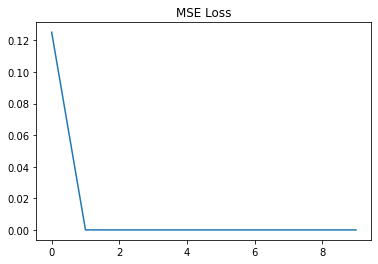

In [28]:
image_size = 300 #image.sape
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16, kernel_size=(4,4),input_shape=(image_size,image_size,1)),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPool2D((3,3)),
    tf.keras.layers.Conv2D(32, kernel_size=(4,4)),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPool2D((3,3)),
    tf.keras.layers.Conv2D(64, kernel_size=(4,4)),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPool2D((3,3)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    # Predict classes probabilities (10 values) 
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])
opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(opt, loss='categorical_crossentropy')
model.summary()
history = model.fit_generator(generator=train_generator, epochs=10)
plt.plot(history.history['loss'])
plt.title('MSE Loss')

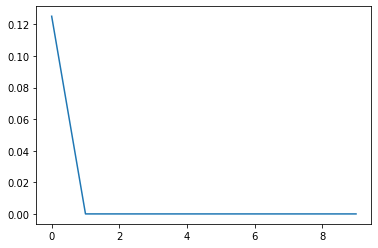

In [81]:
plt.plot(history.history['loss'])

In [29]:
tf.saved_model.save(model, '/content/')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: /content/assets


In [31]:
tf.saved_model.save(opt,'/content/')

INFO:tensorflow:Assets written to: /content/assets


In [91]:
#imtest = cv2.imread('/content/test data/1.jpg')
imtest = cv2.imread('/content/drive/My Drive/train data/2/2/19500.tif')
imtest.shape
imtestgray = cv2.cvtColor(imtest,cv2.COLOR_RGB2GRAY)
imtestgray.shape
imtestgray_norm = imtestgray/255.
imtestgray_norm.shape

(300, 300)

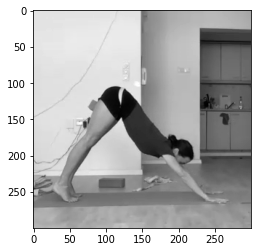

In [92]:
plt.imshow(imtestgray, cmap='gray')

In [88]:
imtestgray_norm=tf.expand_dims(imtestgray_norm,2)
imtestgray_norm=tf.expand_dims(imtestgray_norm,0)
imtestgray_norm.shape

TensorShape([1, 300, 300, 1])

In [ ]:
# !mkdir test\ data
# !mv 1.jpg /content/test\ data/.

In [64]:
# test_datagen = ImageDataGenerator(        rescale=1./255,            # normalize pixel values to [0,1]
#      )  
# test_generator = test_datagen.flow_from_directory(
#     '/content/test data',
#     target_size=(300, 300),
#     color_mode="grayscale",
#     class_mode='categorical')
# # pdb.set_trace()
# model.predict_generator(
#     test_generator, steps=None, callbacks=None, max_queue_size=10, workers=1,
#     use_multiprocessing=False, verbose=0)

Found 0 images belonging to 0 classes.


ValueError: ignored

In [89]:
res= model.predict(imtestgray_norm,batch_size=1)

In [90]:
print(res)

[[2.8961530e-10 6.6583338e-16 9.8382771e-01 5.8744194e-21 7.0232737e-08
  2.2707347e-07 4.7094891e-05 1.1375601e-13 1.6124688e-02 2.5147710e-07]]


In [38]:
imported = tf.saved_model.load('/content/drive/My Drive/assets')

OSError: ignored